# Ames Housing Price Prediction

0) **Problem Statement**

The aim is to predict the sale price of houses in Ames, Iowa, based on 80+ features ranging from physical dimensions to neighborhood and condition. This is a **supervised regression problem**.

1) **Data Overview**

- Rows: 2,930
- Columns: 82
- Features: Numeric and categorical
- Target: `SalePrice`

2) **Data Cleaning**
- Handle missing values (drop, impute, etc.)
- Drop unnecessary features (e.g., `PID`, `Order`)
- Type conversions if needed

3) **Exploratory Data Analysis (EDA)**
- SalePrice distribution
- Correlations with numeric features
- Box plots of categorical features vs. SalePrice

4) **Modeling**
- Baseline: Linear Regression
- Tree-based: Random Forest or XGBoost
- Optional: Regularized models (Ridge/Lasso)

5) **Results and Analysis**
- RMSE, R²
- Cross-validation
- Feature importance

6) **Discussion and Conclusion**
- Findings and insights
- Model performance summary
- Future work suggestions


## Dataset Source

The dataset used in this project is the [Ames Housing dataset](https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset), originally compiled by Dean De Cock and made publicly available on Kaggle. The data contains detailed characteristics of residential homes in Ames, Iowa.

> De Cock, D. (2011). Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project. *Journal of Statistics Education*, 19(3).


In [3]:
## Imports

import os
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew

import kagglehub

In [4]:
path = kagglehub.dataset_download("shashanknecrothapa/ames-housing-dataset")

In [5]:
df = pd.read_csv(os.path.join(path,  os.listdir(path)[0]))

## 1) Data Overview

In [7]:
df.shape

(2930, 82)

In [8]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [10]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [11]:
df.isnull().sum().sum()

15749

In [12]:
len(df) * len(df.columns)

240260

## 2) Data Cleaning

In [14]:
# Drop columns with > 80% missing values
near_empty_cols = [i[0] for i in df.isnull().sum().items() if i[1] > (len(df) * 0.8)]
print(near_empty_cols)
df_clean = df.drop(columns=near_empty_cols)


['Alley', 'Pool QC', 'Fence', 'Misc Feature']


In [15]:
df_clean.isnull().sum().sum()

4918

<Axes: title={'center': 'Missing Value Percentage'}>

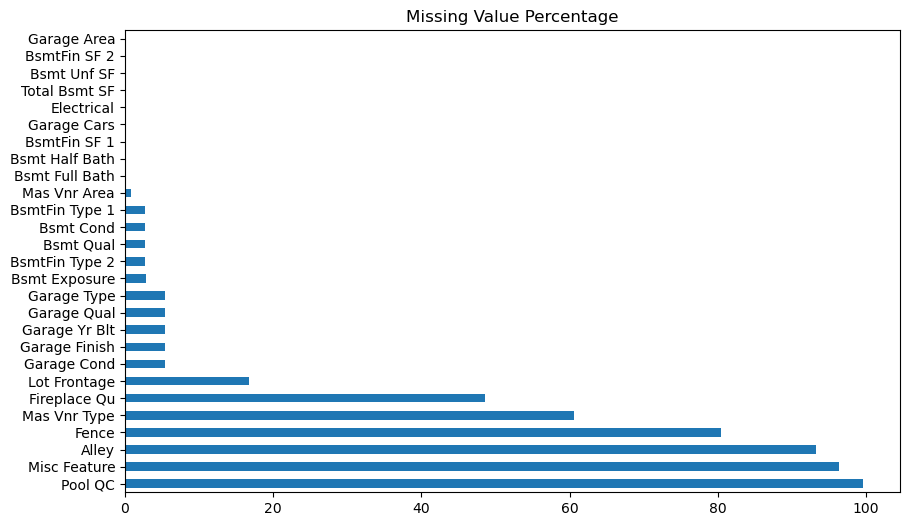

In [16]:
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_percent[missing_percent > 0].plot(kind='barh', figsize=(10, 6), title="Missing Value Percentage")

In [17]:
[i for i in df_clean.isnull().sum().items() if i[1] > 0]

[('Lot Frontage', 490),
 ('Mas Vnr Type', 1775),
 ('Mas Vnr Area', 23),
 ('Bsmt Qual', 80),
 ('Bsmt Cond', 80),
 ('Bsmt Exposure', 83),
 ('BsmtFin Type 1', 80),
 ('BsmtFin SF 1', 1),
 ('BsmtFin Type 2', 81),
 ('BsmtFin SF 2', 1),
 ('Bsmt Unf SF', 1),
 ('Total Bsmt SF', 1),
 ('Electrical', 1),
 ('Bsmt Full Bath', 2),
 ('Bsmt Half Bath', 2),
 ('Fireplace Qu', 1422),
 ('Garage Type', 157),
 ('Garage Yr Blt', 159),
 ('Garage Finish', 159),
 ('Garage Cars', 1),
 ('Garage Area', 1),
 ('Garage Qual', 159),
 ('Garage Cond', 159)]

**Observations:**
1) Electrical column has 1 missing value

2) Garage columns have similar number of missing values:
    * 'Garage Type' has 2 less missing than most other Garage columns
    * 'Garage Cars' and 'Garage Area' have only 1 missing value probably due to them being 0 instead of null/NaN
   
3) Basement columns have similar number of missing values:
    * 'BsmtFin Type 2' has 1 more missing than most other Basement columns
    * 'Bsmt Exposure' has 3 more missing than most other Basement columns

4) Lot Frontage is a tricky one since most homes have lot on the front.

5) Mas Vnr Type & Mas Vnr Area are most likely empty values

6) Fireplace Qu is most likely empty values

In [19]:
# Check when the home built to compare similar homes' electrical value.
df_clean[df_clean['Electrical'].isna()][['Year Built', 'Electrical']]

,Year Built,Electrical
1577,2006,NaN


In [20]:
df_clean[df_clean['Year Built'] >= 1970]['Electrical'].value_counts(normalize=True)

Electrical
SBrkr    1.0
Name: proportion, dtype: float64

In [21]:
df_clean.loc[df_clean['Electrical'].isnull(), 'Electrical'] = 'SBrkr'

In [22]:
numeric_columns = df_clean.select_dtypes(include=['number']).columns
string_columns = df_clean.select_dtypes(include=['object']).columns

In [23]:
garage_cols = [col for col in df_clean.columns if 'Garage' in col]
df_clean[df_clean['Garage Type'].isna()][garage_cols]
garage_cols_string = [col for col in garage_cols if col in string_columns]
garage_cols_numeric = [col for col in garage_cols if col in numeric_columns]

In [24]:
df_clean[df_clean['Garage Type'].isna()][garage_cols_string].isna().sum()

Garage Type      157
Garage Finish    157
Garage Qual      157
Garage Cond      157
dtype: int64

In [25]:
df_clean[df_clean['Garage Type'].isna()][garage_cols_numeric].isna().sum()

Garage Yr Blt    157
Garage Cars        0
Garage Area        0
dtype: int64

In [26]:
mask = df_clean['Garage Type'].isna()
df_clean.loc[mask, garage_cols_string] = df_clean.loc[mask, garage_cols_string].fillna('None')
df_clean.loc[mask, garage_cols_numeric] = df_clean.loc[mask, garage_cols_numeric].fillna(0)

In [27]:
df_clean[df_clean['Garage Yr Blt'].isna()][garage_cols + ['Year Built']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Year Built
1356,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,1910
2236,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,1923


In [28]:
mask = df_clean['Garage Yr Blt'].isna()
df_clean.loc[mask, 'Garage Yr Blt'] = df_clean.loc[mask, 'Year Built']

In [29]:
df_clean[df_clean['Garage Finish'].isna()][garage_cols + ['Year Built']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Year Built
1356,Detchd,1910.0,NaN,1.0,360.0,NaN,NaN,1910
2236,Detchd,1923.0,NaN,NaN,NaN,NaN,NaN,1923


In [30]:
old_house_mask = (df_clean['Year Built'] < 1930) & (df_clean['Garage Type'] == 'Detchd')
reference_df = df_clean[old_house_mask & df_clean[garage_cols].notnull().all(axis=1)]

fill_values_old_detached = {}
for col in garage_cols:
    if reference_df[col].dtype == 'object':
        fill_values_old_detached[col] = reference_df[col].mode()[0]
    else:
        fill_values_old_detached[col] = reference_df[col].median()
fill_values_old_detached

{'Garage Type': 'Detchd',
 'Garage Yr Blt': 1934.0,
 'Garage Finish': 'Unf',
 'Garage Cars': 1.0,
 'Garage Area': 342.0,
 'Garage Qual': 'TA',
 'Garage Cond': 'TA'}

In [31]:
df_clean[df_clean['Garage Finish'].isna()][garage_cols + ['Year Built', 'PID']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Year Built,PID
1356,Detchd,1910.0,NaN,1.0,360.0,NaN,NaN,1910,903426160
2236,Detchd,1923.0,NaN,NaN,NaN,NaN,NaN,1923,910201180


In [32]:
df_clean[df_clean['PID'] == 910201180][garage_cols + ['Year Built']]
# df_clean[df_clean['PID'] == 910201180]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Year Built
2236,Detchd,1923.0,NaN,NaN,NaN,NaN,NaN,1923


In [33]:
mask = df_clean['Garage Finish'].isna()
for col, value in fill_values_old_detached.items():
    df_clean.loc[mask & df_clean[col].isna(), col] = value

In [34]:
bsmt_cols = [col for col in df_clean.columns if 'Bsmt' in col]
df_clean[df_clean['Bsmt Full Bath'].isna()][bsmt_cols]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN


In [35]:
df_clean.dropna(subset=['Bsmt Full Bath'], inplace=True)

In [36]:
df_clean[(df_clean['BsmtFin Type 2'].isna()) & (df_clean['BsmtFin Type 1'].notna())][bsmt_cols + ['Year Built']]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Year Built
444,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0,2003


In [37]:
df_clean[(df_clean['BsmtFin SF 2'] > 200) & (df_clean['Year Built'] >= 2000)].groupby(['BsmtFin Type 1','BsmtFin Type 2']).size()

BsmtFin Type 1  BsmtFin Type 2
ALQ             BLQ               1
BLQ             GLQ               1
                Rec               1
GLQ             ALQ               5
                BLQ               1
                LwQ               1
dtype: int64

In [38]:
df_clean.loc[(df_clean['BsmtFin Type 2'].isna()) & (df_clean['BsmtFin Type 1'].notna()), 'BsmtFin Type 2'] = 'ALQ'

In [39]:
[i for i in df_clean.isnull().sum().items() if i[1] > 0]

[('Lot Frontage', 490),
 ('Mas Vnr Type', 1773),
 ('Mas Vnr Area', 23),
 ('Bsmt Qual', 78),
 ('Bsmt Cond', 78),
 ('Bsmt Exposure', 81),
 ('BsmtFin Type 1', 78),
 ('BsmtFin Type 2', 78),
 ('Fireplace Qu', 1421)]

In [40]:
df_clean[(df_clean['Bsmt Exposure'].isna()) & (df_clean['Bsmt Qual'].notna())][bsmt_cols + ['Year Built']]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Year Built
66,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0,2005
1796,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0,2007
2779,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0,2002


In [41]:
df_clean[(df_clean['BsmtFin Type 1'] == 'Unf')].groupby(['Bsmt Exposure']).size()

Bsmt Exposure
Av     83
Gd     22
Mn     57
No    686
dtype: int64

In [42]:
df_clean.loc[(df_clean['Bsmt Exposure'].isna()) & (df_clean['Bsmt Qual'].notna()), 'Bsmt Exposure'] = 'No'

In [43]:
df_clean[(df_clean['Bsmt Exposure'].isna())][bsmt_cols + ['Year Built']].head()

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Year Built
83,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1978
154,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1955
206,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1930
243,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1946
273,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1945


In [44]:
mask = df_clean['Bsmt Exposure'].isna()
bsmt_cols_string = [col for col in bsmt_cols if col in string_columns]
df_clean.loc[mask, bsmt_cols_string] = df_clean.loc[mask, bsmt_cols_string].fillna('None')

In [45]:
df_clean.groupby(['Bsmt Exposure']).size()

Bsmt Exposure
Av       418
Gd       284
Mn       239
No      1909
None      78
dtype: int64

In [46]:
[i for i in df_clean.isnull().sum().items() if i[1] > 0]

[('Lot Frontage', 490),
 ('Mas Vnr Type', 1773),
 ('Mas Vnr Area', 23),
 ('Fireplace Qu', 1421)]

In [47]:
df_clean.loc[df_clean['Mas Vnr Type'].isna(), 'Mas Vnr Area'] = 0

In [48]:
df_clean.loc[df_clean['Mas Vnr Type'].isna(), 'Mas Vnr Type'] = 'None'

In [49]:
[i for i in df_clean.isna().sum().items() if i[1] > 0]

[('Lot Frontage', 490), ('Fireplace Qu', 1421)]

In [50]:
df_clean['Lot Frontage'] = df_clean.groupby(['Neighborhood', 'Lot Config'])['Lot Frontage'].transform(
    lambda x: x.fillna(x.median())
)

In [51]:
df_clean[df_clean['Lot Frontage'].isna()][['Lot Frontage', 'Lot Area', 'Lot Shape', 'Lot Config', 'Total Bsmt SF']]

,Lot Frontage,Lot Area,Lot Shape,Lot Config,Total Bsmt SF
1007,NaN,14067,Reg,FR3,836.0
1032,NaN,14311,IR1,FR3,1236.0
2256,NaN,9763,IR1,Inside,1502.0
2346,NaN,10464,IR1,FR3,988.0
2440,NaN,12104,IR1,FR3,1035.0
2788,NaN,3612,IR1,Inside,630.0
2892,NaN,8239,IR1,Inside,0.0


In [52]:
df_clean['Lot Frontage'] = df_clean.groupby('Lot Config')['Lot Frontage'].transform(
    lambda x: x.fillna(x.median())
)

In [53]:
df_clean[df_clean['Lot Frontage'].isna()][['Lot Frontage', 'Lot Area', 'Lot Shape', 'Lot Config', 'Total Bsmt SF']]

,Lot Frontage,Lot Area,Lot Shape,Lot Config,Total Bsmt SF


In [54]:
[i for i in df_clean.isna().sum().items() if i[1] > 0]

[('Fireplace Qu', 1421)]

In [55]:
df_clean[(df_clean['Fireplace Qu'].isna())].groupby(['Fireplaces']).size()

Fireplaces
0    1421
dtype: int64

In [56]:
df_clean.loc[df_clean['Fireplace Qu'].isna(), 'Fireplace Qu'] = 'None'

In [57]:
duplicates = df_clean.duplicated()
df_clean[duplicates]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [58]:
df_clean.shape

(2928, 78)

In [59]:
# Order and PID are Identifiers
# Mo Sold, and Yr Sold are not relevant
unnecessary_cols = ['Order', 'PID', 'Mo Sold', 'Yr Sold']
df_clean = df_clean.drop(columns=unnecessary_cols)
df_clean.shape

(2928, 74)

In [60]:
current_year = datetime.datetime.now().year
df_clean['House_Age'] = current_year - df_clean['Year Built']
df_clean['Years_Since_Remodel'] = current_year - df_clean['Year Remod/Add']
df_clean['Total_SF'] = df_clean['Total Bsmt SF'] + df_clean['1st Flr SF'] + df_clean['2nd Flr SF']
df_clean['Total_Bathrooms'] = df_clean['Full Bath'] + 0.5*df_clean['Half Bath'] + df_clean['Bsmt Full Bath'] + 0.5*df_clean['Bsmt Half Bath']
df_clean['Has_Pool'] = (df_clean['Pool Area'] > 0).astype(int)

updated_cols = [
    'Year Built', 'Year Remod/Add', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 
    'Full Bath', 'Half Bath','Bsmt Full Bath', 'Bsmt Half Bath', 'Pool Area'
]

df_clean = df_clean.drop(columns=updated_cols)

In [61]:
df_clean.shape

(2928, 69)

In [62]:
quality_cols = []
qual_map = {'Ex': 5, 'Gd': 4, 'Av': 3, 'TA': 3, 'Mn': 2, 'Fa': 2, 'Po': 1, 'No': 1, 'None': 0}
quality_values = set(k for k in qual_map.keys() if k != 'None')
for col in df_clean.select_dtypes(include='object').columns:
    unique_vals = set(df_clean[col].dropna().unique())
    if quality_values & unique_vals:  # if there's any intersection
        quality_cols.append(col)
print(quality_cols)
for col in quality_cols:
    df_clean[col] = df_clean[col].map(qual_map)

['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond']


**Data Cleaning Summary**

The dataset contained several missing values across features like Lot Frontage, Mas Vnr Area, Fireplace Qu, and various basement-related and garage-related columns. These were addressed through a combination of:

    Domain-informed imputations (e.g., using Year Built to fill Garage Yr Blt, or setting Mas Vnr Area = 0 if type was None)

    Ordinal mapping of quality scores (e.g., Ex to Po mapped from 5 to 1)

    Log-transformation of the SalePrice to reduce right-skewness and improve model performance

    Dropping low-utility columns such as Utilities, Alley, and Misc Feature due to high missingness or redundancy

We also engineered helpful features such as:

    House_Age, Years_Since_Remodel, Total_SF, Total_Bathrooms, and Log SalePrice (coming up shortly)

The data is now in a clean, analysis-ready state, enabling meaningful EDA and predictive modeling.

## 3) Exploratory Data Analysis (EDA)

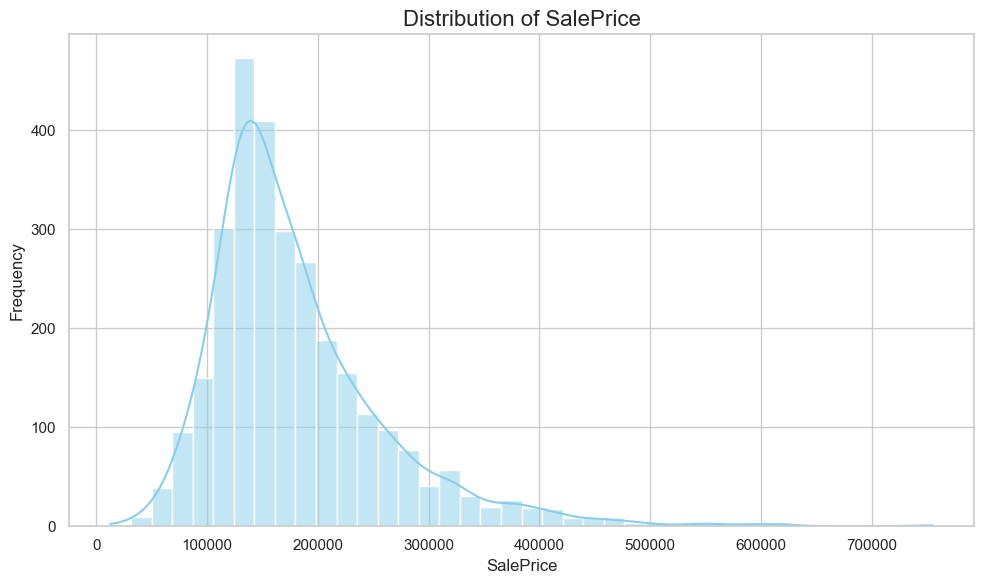

In [65]:
# Set style
sns.set(style="whitegrid")

# Plot SalePrice distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['SalePrice'], kde=True, bins=40, color="skyblue")
plt.title("Distribution of SalePrice", fontsize=16)
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

The Distribution of SalePrice is Right-Skewed

- Most houses are modestly priced, but a few luxury homes drive the prices way up.
- This causes a long right tail, which:
    - Violates assumptions of many models (especially Linear Regression)
    - Can overemphasize expensive outliers

In [67]:
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])
skewed_features = numeric_df.apply(skew).sort_values(ascending=False)
print(skewed_features.head(15))

Misc Val           21.981015
Lot Area           12.925769
Low Qual Fin SF    12.107743
3Ssn Porch         11.393979
Kitchen AbvGr       4.309915
BsmtFin SF 2        4.137042
Enclosed Porch      4.010846
Screen Porch        3.953852
Mas Vnr Area        2.627041
Open Porch SF       2.530112
Wood Deck SF        1.840904
SalePrice           1.744957
Total_SF            1.518309
Lot Frontage        1.436859
BsmtFin SF 1        1.415218
dtype: float64


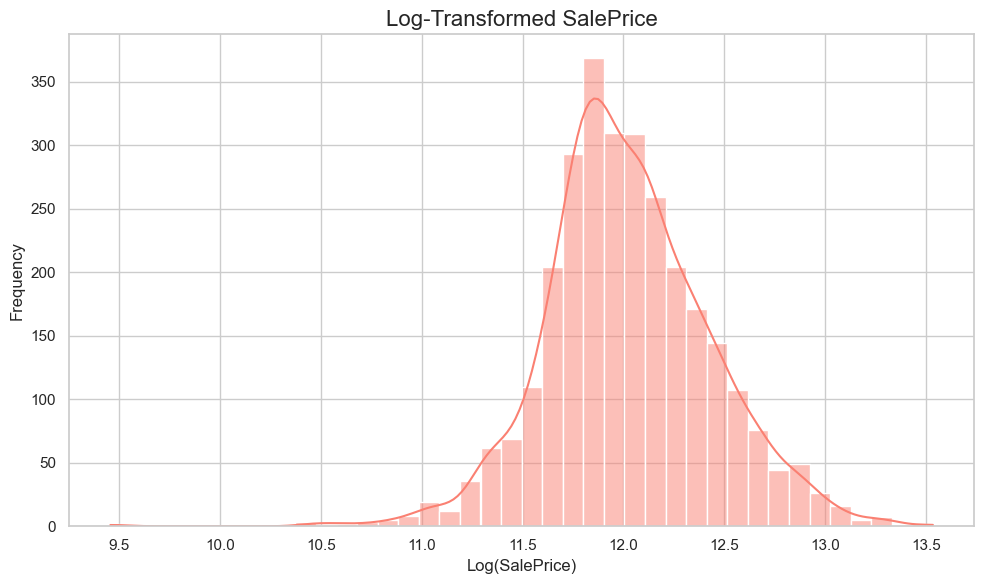

In [68]:
df_clean['Log SalePrice'] = np.log1p(df_clean['SalePrice'])  # log(1 + x)

# Plot it
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Log SalePrice'], kde=True, bins=40, color="salmon")
plt.title("Log-Transformed SalePrice", fontsize=16)
plt.xlabel("Log(SalePrice)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Why Use Log SalePrice Instead of SalePrice?**

The key reason is that raw SalePrice is right-skewed as in the histogram above. Here's why that matters:
- SalePrice (raw):
    - Not normally distributed
    - Outliers (expensive homes) can dominate learning
    - Violates assumptions for some models (e.g., Linear Regression assumes residuals are normally distributed)
    - Can make model predictions biased or less stable

- Log SalePrice:
    - More normally distributed (after log transformation)
    - Makes model residuals more stable
    - Helps the model learn relative price differences, not just large dollar swings
    - Reduces the effect of outliers (luxury homes, etc.)

For modeling, we’ll train models using Log SalePrice as the target.
But when we evaluate model performance, make final predictions, and interpret results we'll convert predictions back to the original scale:
<center> <b> predicted_price = np.expm1(predicted_log_price)</b></center>
This ensures the output is understandable in dollars.

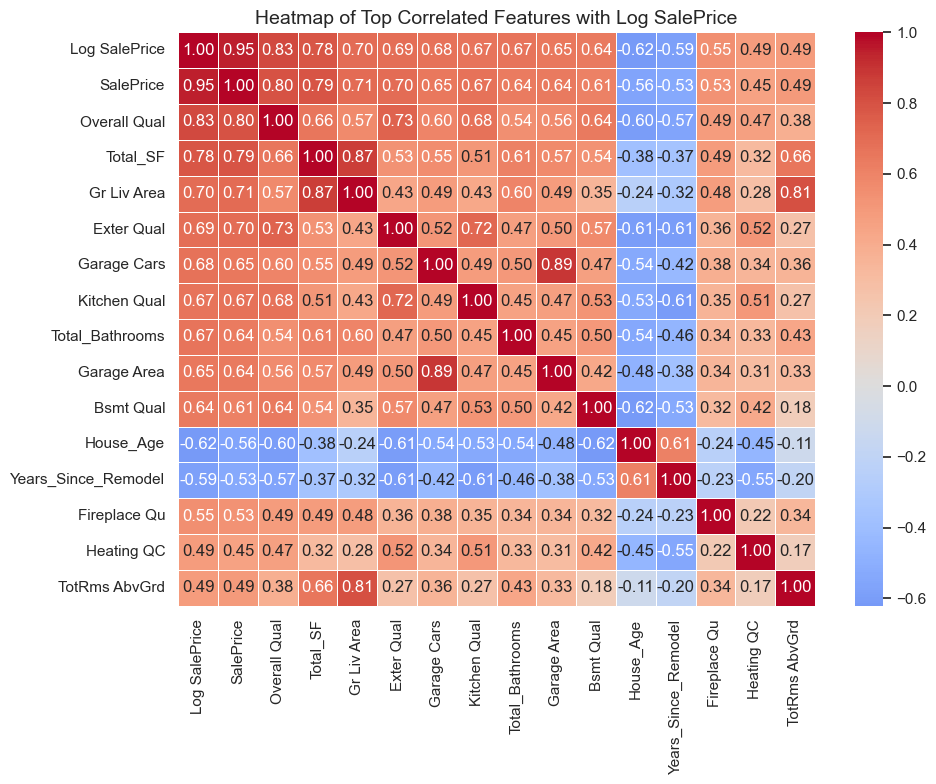

In [71]:
# Step 1: Correlation matrix of numeric columns
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

# Step 2: Get top 10 correlated features with Log SalePrice
top_features = corr_matrix['Log SalePrice'].abs().sort_values(ascending=False).head(16).index  # includes Log SalePrice

# Step 3: Slice the matrix to include only those top features
top_corr_matrix = corr_matrix.loc[top_features, top_features]

# Step 4: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Heatmap of Top Correlated Features with Log SalePrice", fontsize=14)
plt.tight_layout()
plt.show()

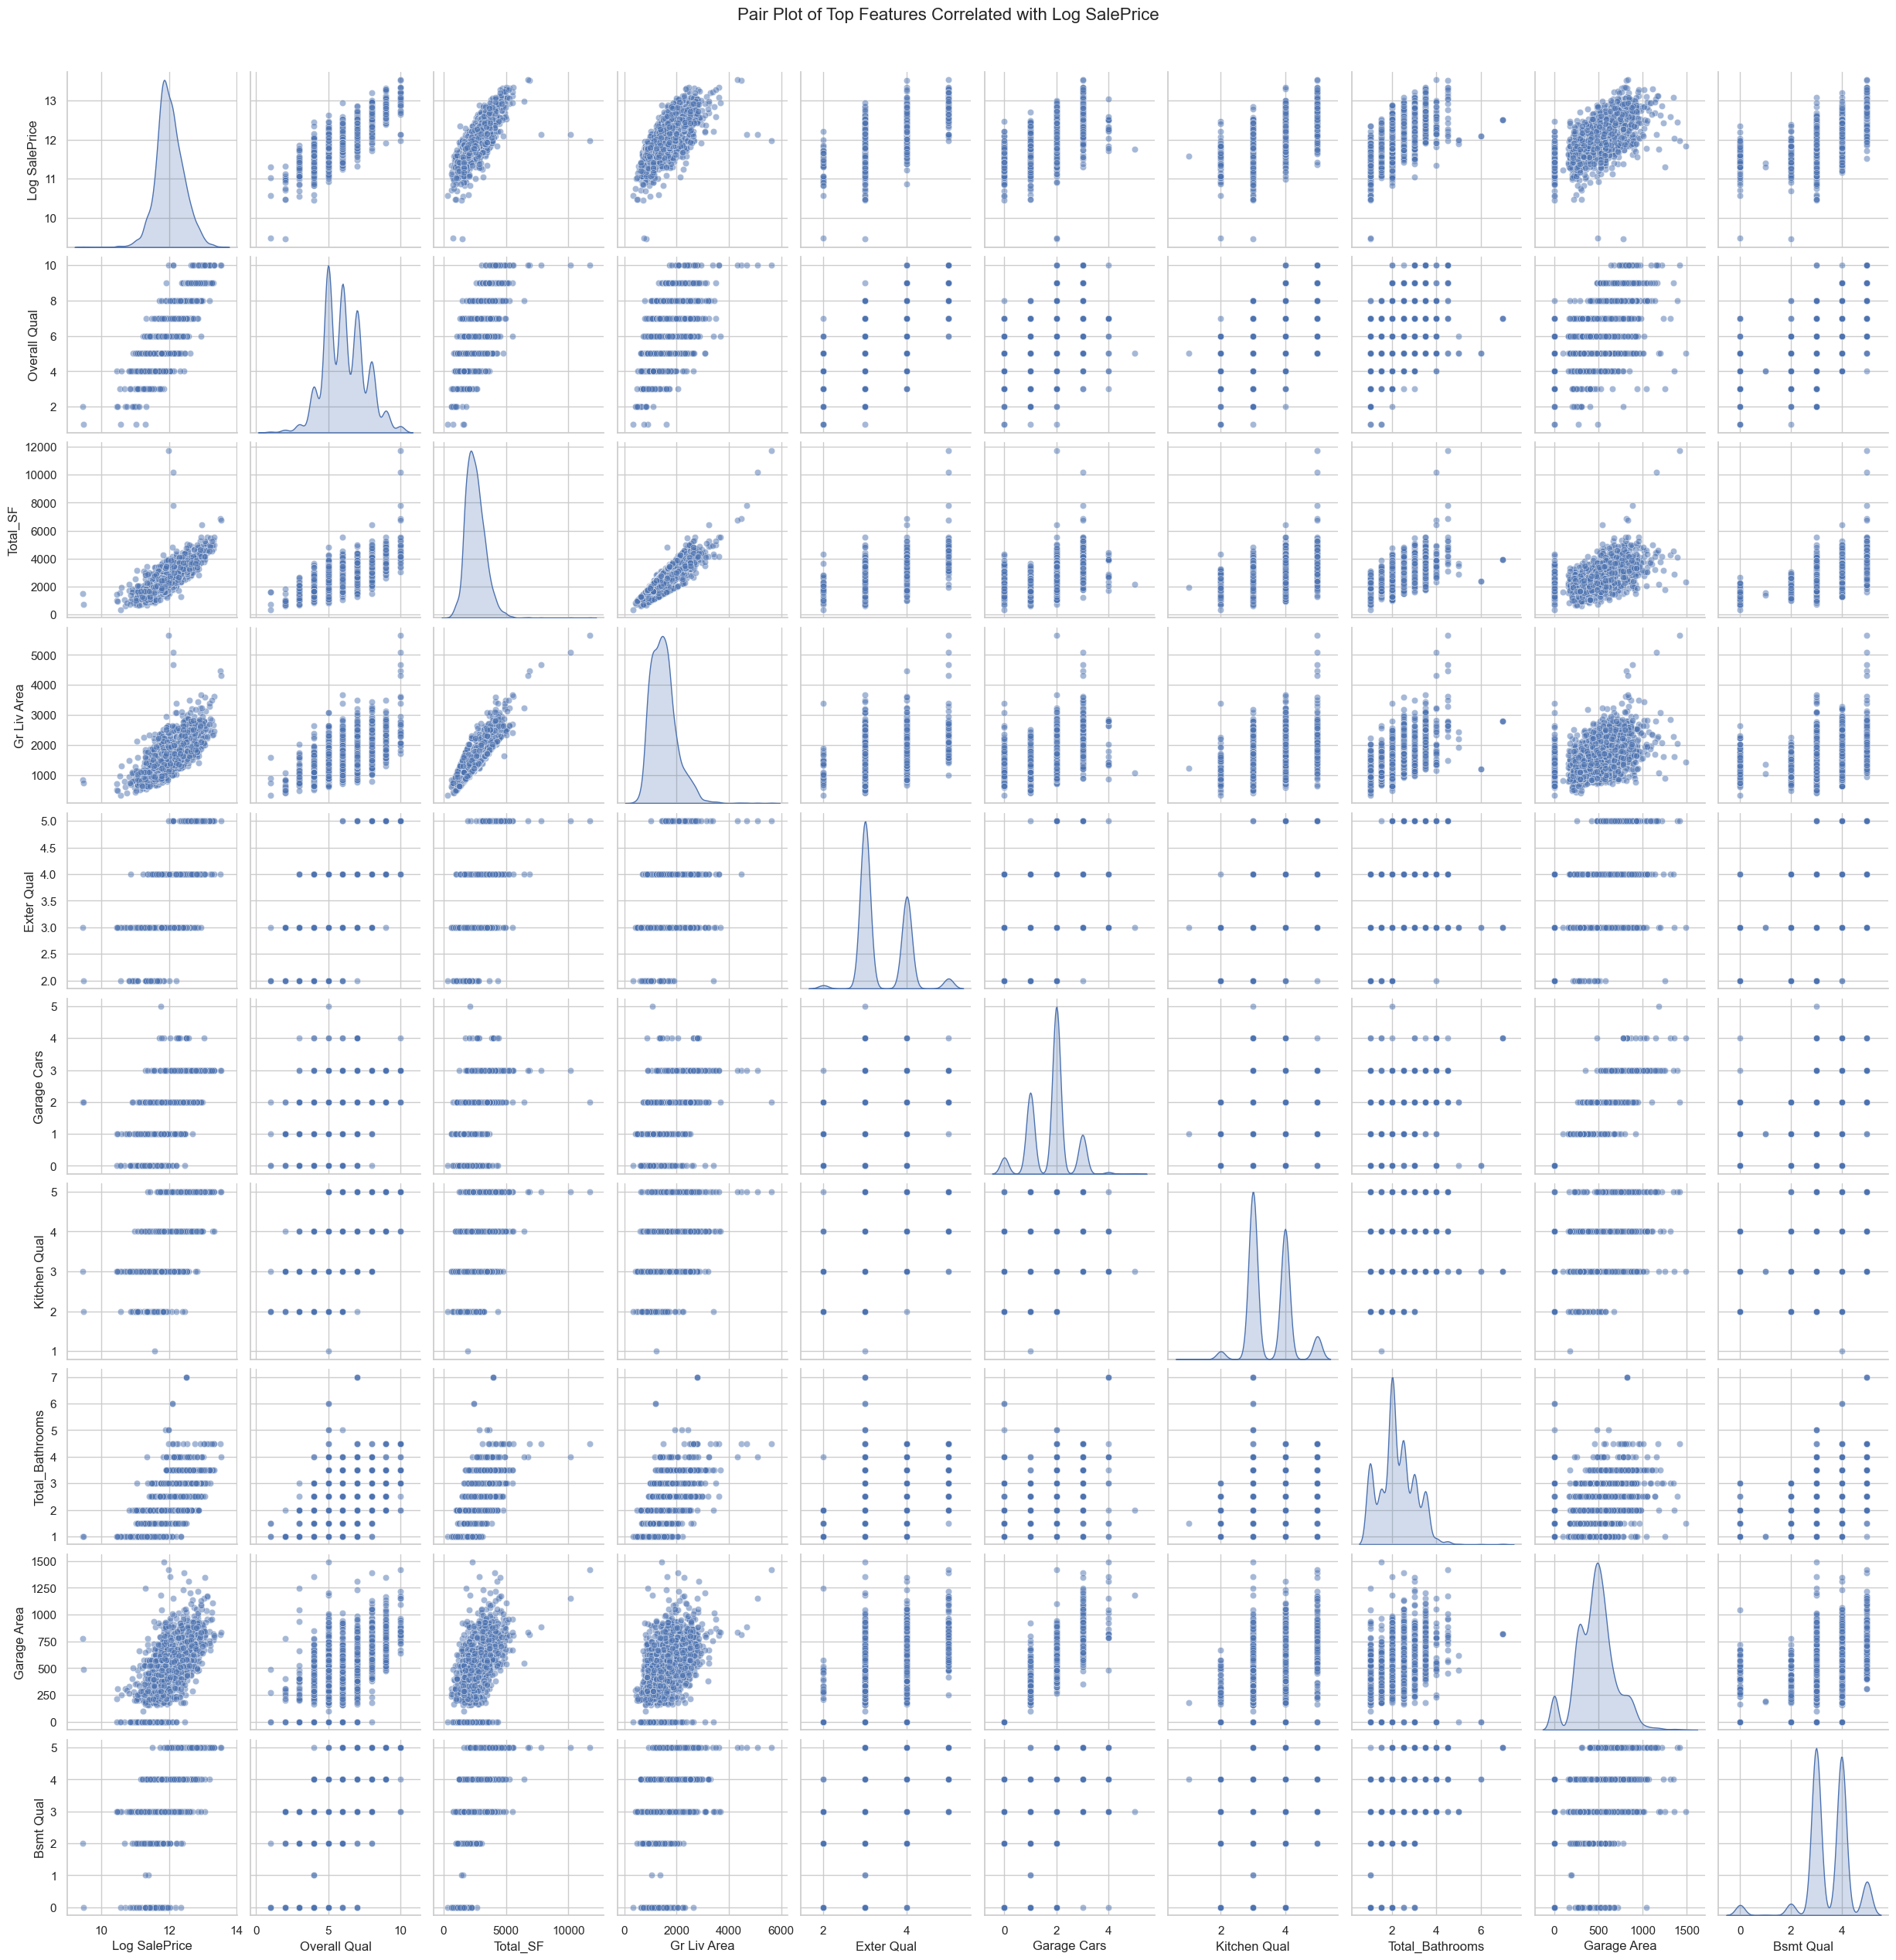

In [72]:
top_features_pairplot = [i for i in top_features if i != 'SalePrice'][:10]
pairplot_data = df_clean[top_features_pairplot]
sns.pairplot(pairplot_data, diag_kind='kde', plot_kws={"alpha": 0.5})
plt.suptitle("Pair Plot of Top Features Correlated with Log SalePrice", y=1.02, fontsize=16)
plt.show()

EDA Summary 
1. SalePrice Distribution
    - Raw SalePrice is right-skewed — most homes are in the mid-price range, but a few high-end properties pull the tail to the right.
    - This violates assumptions for many models (like linear regression).

2. Skewness Analysis
    - Calculated Pearson skewness coefficients using scipy.stats.skew for numeric features.
    - Identified that most features are strongly right-skewed (values more than 1), which may impact linear modeling.
    - This helped guide transformation decisions and understand variable distributions more quantitatively.

3. Log-Transformed SalePrice Distribution
    - Applied np.log1p(SalePrice) to get a smoother, more normal-like distribution.
    - Helps models generalize better and handle outliers more gracefully.

4. Correlation Heatmap
   - Generated a focused heatmap of the top 10 numerical features most correlated with Log SalePrice.
   - Identified strong predictors like:
       - Overall Qual
       - Total_SF
       - Gr Liv Area
       - Exter Qual

5. Pair Plot
    - Created pairwise plots of top features to visually assess relationships and interactions.
    - Sampled rows for performance, used diag_kind='kde' for smooth distributions.

## 4) Modeling

In [75]:
from sklearn.linear_model import LinearRegression

# 1. Select a few top features
selected_features = [i for i in top_features if 'SalePrice' not in i][:10]
X = df_clean[selected_features]
y = df_clean['Log SalePrice']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred = model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse_linear:.4f}")
print(f"R² Score: {r2:.4f}")


RMSE: 0.1754
R² Score: 0.8205


RMSE ≈ 0.1754, means that the average prediction error is about 17.5% of the price in log scale

R² ≈ 0.8205 means that my model explains ~82% of the variance in Log SalePrice

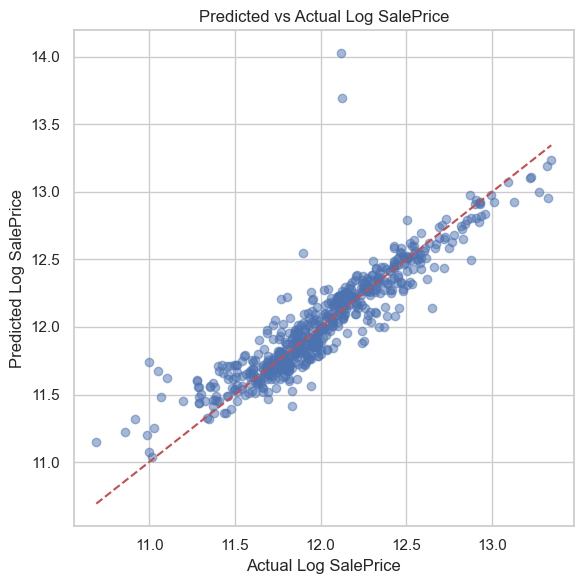

In [77]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Log SalePrice")
plt.ylabel("Predicted Log SalePrice")
plt.title("Predicted vs Actual Log SalePrice")
plt.tight_layout()
plt.show()

In [78]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
scores = cross_val_score(ridge, X, y, scoring='neg_root_mean_squared_error', cv=5)
rmse_ridge = -scores.mean()
print(f"Ridge RMSE (CV Mean): {rmse_ridge:.5f}")

Ridge RMSE (CV Mean): 0.16791


In [79]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
scores = cross_val_score(lasso, X, y, scoring='neg_root_mean_squared_error', cv=5)
rmse_lasso = -scores.mean()
print(f"Lasso RMSE (CV Mean): {rmse_lasso:.5f}")

Lasso RMSE (CV Mean): 0.16794


In [80]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X, y, scoring='neg_root_mean_squared_error', cv=5)
rmse_rf = -rf_scores.mean()

print(f"RandomForestRegressor RMSE (CV Mean): {rmse_rf:.5f}")

RandomForestRegressor RMSE (CV Mean): 0.15120


In [81]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Step 2: Set up the model and GridSearch
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Step 3: Fit to training data
grid_search.fit(X, y)

rmse_rf_grid = -grid_search.best_score_

# Step 4: Access the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print(f"Best CV RMSE:, {rmse_rf_grid:.5f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV RMSE:, 0.15047


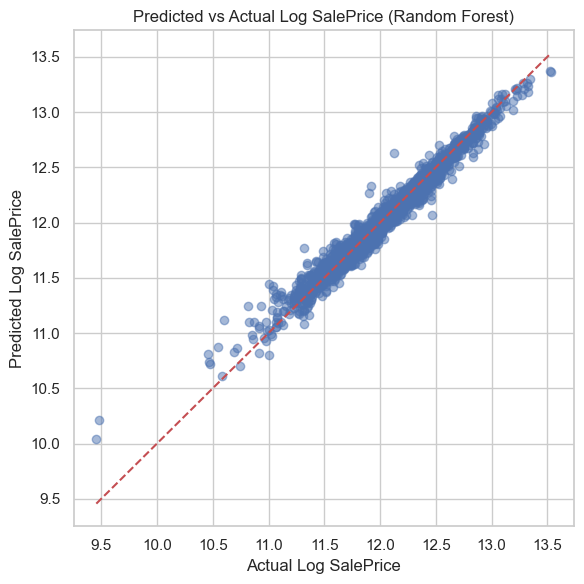

In [82]:
# Step 5: Predict and plot
y_pred = grid_search.predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Log SalePrice")
plt.ylabel("Predicted Log SalePrice")
plt.title("Predicted vs Actual Log SalePrice (Random Forest)")
plt.tight_layout()
plt.show()

- Points closely follow the red dashed line which is almost perfect prediction.
- Minor spread at the higher price range which is totally normal due to fewer high-end homes
- Strong overall fit that confirms low RMSE of ~0.1505

## 5) Results and Analysis

In [85]:
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Random Forest", "Random Forest (Grid Search)"],
    "CV RMSE": [rmse_linear, rmse_ridge, rmse_lasso, rmse_rf, rmse_rf_grid]
})

comparison_df = comparison_df.sort_values(by="CV RMSE")
print(comparison_df)

                         Model   CV RMSE
4  Random Forest (Grid Search)  0.150467
3                Random Forest  0.151198
1             Ridge Regression  0.167910
2             Lasso Regression  0.167942
0            Linear Regression  0.175412


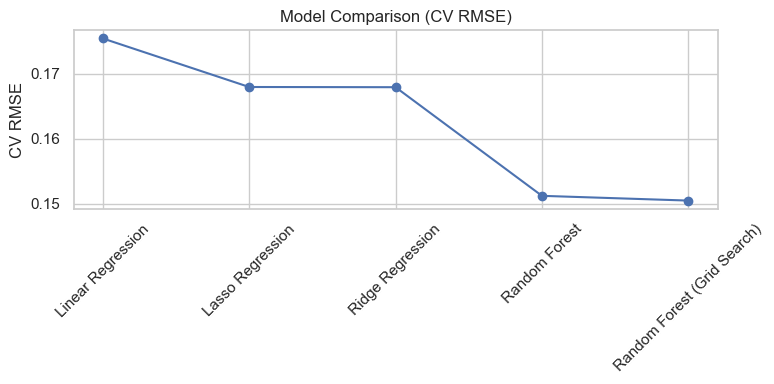

In [86]:
plt.figure(figsize=(8, 4))
plt.plot(comparison_df['Model'], comparison_df['CV RMSE'], marker='o')
plt.gca().invert_xaxis()
plt.title("Model Comparison (CV RMSE)")
plt.ylabel("CV RMSE")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Modeling Summary**

We developed and compared multiple supervised learning models to predict the log-transformed sale price of homes (Log SalePrice). Our modeling pipeline began with a baseline Linear Regression model, followed by regularized models and tree-based ensemble methods.
1) Baseline Model
A basic Linear Regression model using the top 10 most correlated features was implemented first.
- RMSE: ~0.1754

2) Regularized Model

A Ridge Regression model was trained to address potential multicollinearity.

- It slightly outperformed the baseline with an RMSE of ~0.1679.

3) Ensemble Model

A Random Forest Regressor was tuned using GridSearchCV.

Best hyperparameters:
- n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=1
- RMSE: ~0.1505 (best performing model)

Modeling Techniques Used

- Cross-validation (5-fold) for consistent performance estimation
- Feature engineering to enhance input signal (House_Age, Total_SF, etc.)
- Regularization to mitigate overfitting
- Hyperparameter tuning using grid search

Model Performances:

| Model                       |   CV RMSE |
|----------------------------:|:---------:|
| Random Forest (Grid Search) |  0.150467 |
| Random Forest               |  0.151198 |
| Ridge Regression            |  0.167910 |
| Lasso Regression            |  0.167942 |
| Linear Regression           |  0.175412 |

The Random Forest model was ultimately selected for its strong performance, flexibility, and ability to capture nonlinear relationships between features and target.

## 6) Discussion and Conclusion

This project aimed to predict house sale prices using the Ames Housing Dataset and demonstrated how thoughtful data preparation and iterative modeling can lead to improved prediction performance.

***Key Takeaways***
- Data quality matters: Cleaning and transforming features (e.g., log-transforming SalePrice, mapping ordinal qualities) significantly improved model readiness.
- Skewness detection guided our use of log1p() on features like SalePrice, helping linear models behave more predictably.
- Random Forest models outperformed linear approaches by capturing nonlinear relationships and feature interactions.

***What Didn’t Work***

- Simple linear models struggled to capture complex patterns in the data, especially with features like Gr Liv Area that exhibited strong skew and outlier influence.
- Regularization (Ridge) helped but couldn’t match the flexibility of tree-based models.

***Suggestions for Future Work***

- Explore additional models such as XGBoost or LightGBM for potential performance gains.
- Add categorical encoding (e.g., target or frequency encoding) for more robust use of non-numeric features.
- Consider deploying the model in a simple web app or dashboard to demonstrate real-world utility.